In [ ]:
!pip install opencv-python pydotplus six graphviz

In [11]:
# importamos las librerias necesarias
import sys
assert sys.version_info >= (3, 5)
import os
import pandas as pd
import numpy as np
import seaborn as sns

In [12]:
import matplotlib.pyplot as plt

In [13]:
import numpy as np 
# Estandarizador (transforma las variables en z-scores)
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler() # Creamos el estandarizador para usarlo posteriormente

In [14]:
DATA_PATH = "../data"
def load_data_prep(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "train_set_limpio.csv")
    return pd.read_csv(csv_path)

def load_data_test(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "test_set_limpio.csv")
    return pd.read_csv(csv_path)

In [15]:
train_set = load_data_prep()
test_set = load_data_test()
test_set.shape, train_set.shape

((13, 291), (52, 292))

In [16]:
test_set.loc[test_set.cod.str.contains('sub-500'),'label'] = '1'
test_set.loc[test_set.cod.str.contains('sub-10'),'label'] = '0'
print(test_set[['cod','label']])

          cod label
0   sub-10438     0
1   sub-10487     0
2   sub-50004     1
3   sub-10345     0
4   sub-50010     1
5   sub-10492     0
6   sub-50033     1
7   sub-50025     1
8   sub-10523     0
9   sub-10235     0
10  sub-10273     0
11  sub-50020     1
12  sub-10325     0


In [17]:
columnas = [
    'ufsl_branch_volume',
    'slfr_total_area_of_end_regions',
    'slfl_md',
    'afsr_span',
    'cfpr_span',
    'afsl_irregularity_of_end_region_1',
    'cfpr_radius_of_end_region_2',
    'ufsr_radius_of_end_region_2',
    'cfpr_irregularity_of_end_region_1',
    'fatr_irregularity_of_end_region_1',
    'ufsr_irregularity_of_end_region_1',
    'cfpl_ad',
    'fatl_ad',
    'ufsl_ad',
    'afsl_irregularity_of_end_region_2',
    'cfpr_dti_fa',
    'fatr_dti_fa',
    'cfpl_irregularity_of_end_region_2',
    'afsr_dti_fa',
    'ufsr_ad',
    'afsr_radius_of_end_region_2',
    'slfr_radius_of_end_region_2',
    'afsl_trunk_volume',
    'afsr_curl',
    'slfr_mean_length',
    'fatl_volume',
    'fatr_branch_volume',
    'fatr_nrdi02L',
    'cfpl_radius_of_end_region_2',
    'afsl_md',
    'slfr_total_radius_of_end_regions',
    'slfr_irregularity_of_end_region_2',
    'ufsl_diameter',
    'ufsl_irregularity',
    'ufsl_nrdi02L',
    'ufsl_nrdi04L',
    'ufsl_nrdi06L',
    'ufsl_rdi',
    'afsr_irregularity_of_end_region_2',
    'fatr_elongation',
    'ufsr_elongation',
    'cfpl_area_of_end_region_1',
    'fatr_span',
    'ufsr_span',
    'slfl_area_of_end_region_1',
    'cfpr_irregularity_of_end_region_2',
    'fatr_irregularity_of_end_region_2',
    'ufsr_irregularity_of_end_region_2',
    'afsr_elongation',
    'cfpr_elongation',
    'cfpl_trunk_volume',
    'fatl_trunk_volume',
    'ufsl_trunk_volume',
    'slfl_curl',
    'afsl_diameter',
    'afsl_irregularity',
    'afsl_nrdi02L',
    'afsl_nrdi04L',
    'afsl_nrdi06L',
    'afsr_branch_volume',
    'afsr_nrdi04L',
    'afsr_total_radius_of_end_regions',
    'afsr_total_surface_area',
    'cfpl_diameter',
    'cfpl_irregularity',
    'cfpl_total_radius_of_end_regions',
    'cfpl_volume',
    'cfpr_branch_volume',
    'cfpr_nrdi02L',
    'cfpr_nrdi04L',
    'cfpr_qa',
    'cfpr_rdi',
    'cfpr_total_radius_of_end_regions',
    'cfpr_total_surface_area',
    'fatl_diameter',
    'fatl_irregularity',
    'fatl_nrdi02L',
    'fatl_nrdi04L',
    'fatl_nrdi06L',
    'fatl_rdi',
    'fatl_total_radius_of_end_regions',
    'fatr_qa',
    'fatr_rdi',
    'fatr_total_radius_of_end_regions',
    'fatr_total_surface_area',
    'slfr_radius_of_end_region_1',
    'ufsr_dti_fa',
    'slfl_branch_volume',
    'slfl_span',
    'cfpr_curl',
    'fatr_curl']


In [18]:
X_train = train_set[columnas]
X_test = test_set[columnas]
y_test = test_set['label']
y_train = train_set['label']
X_train.shape, X_test.shape, y_test.shape, y_train.shape


((52, 91), (13, 91), (13,), (52,))

In [19]:
# Ajustamos el estandarizador
std_scale.fit(X_test)
std_scale.fit(X_train)

# Aplicamos el estandarizador y obtenemos la matriz de features escaleados
X_test_scaled = std_scale.transform(X_test)
X_scaled = std_scale.transform(X_train)

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# instanciemos el modelo y entremoslo en el conjunto de autos
arbol = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=2, ccp_alpha=0)
arbol.fit(X_scaled,y_train)
accuracy_score(y_train, arbol.predict(X_scaled))

0.9807692307692307

In [21]:
# veamos que tan bien le fue a este modelo
y_test = y_test.astype(y_train.dtype)
print(classification_report(y_true=y_test,y_pred=arbol.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       1.00      0.40      0.57         5

    accuracy                           0.77        13
   macro avg       0.86      0.70      0.71        13
weighted avg       0.83      0.77      0.74        13



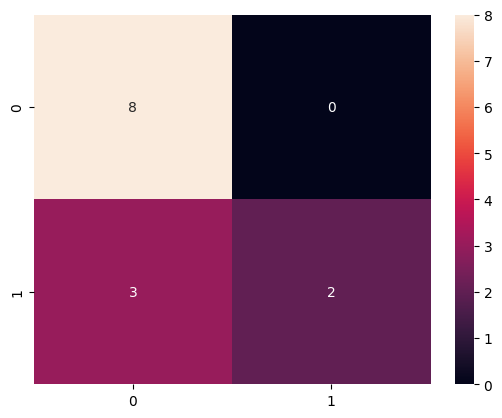

In [22]:
cf_matrix = confusion_matrix(y_test, arbol.predict(X_test_scaled))
sns.heatmap(cf_matrix, annot=True);

## Feature importance

Los árboles nos permiten definir una manera de medir la importancia de los features (o *Feature Importances*) basado en la ganancia de información obtenida cada vez que se utilizo cada feature para hacer un split. Para esto, una vez entrando el árbol, el método que utilizaremos es: 

```
# arbol.feature_importances_
```

In [23]:
# calculando las 5 feature importances mas altas
importances = pd.Series(arbol.feature_importances_).sort_values(ascending=False)[:10]
importances

59    0.243845
53    0.208888
60    0.160162
19    0.127003
88    0.090716
27    0.087088
86    0.082298
0     0.000000
65    0.000000
64    0.000000
dtype: float64

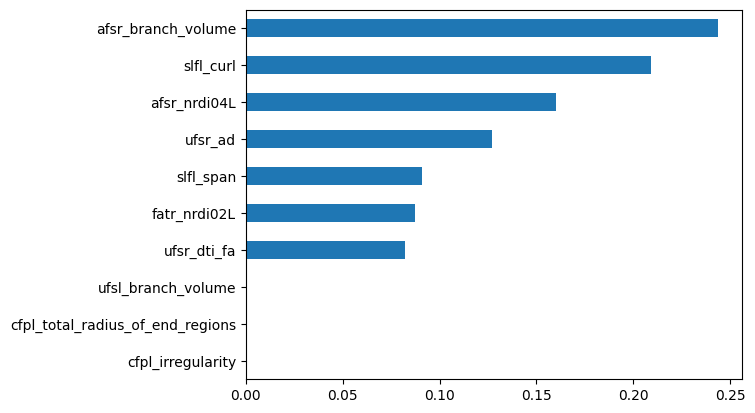

In [24]:
f5_names = list(pd.Series(columnas)[importances.index.to_list()])
fig, ax = plt.subplots()
importances.plot.barh(ax=ax)
ax.set_yticklabels(f5_names)
ax.invert_yaxis()

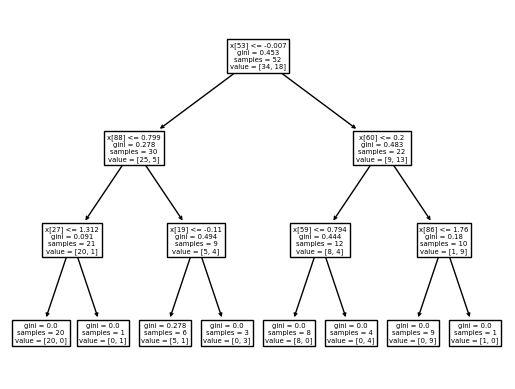

In [25]:
plot_tree(arbol);


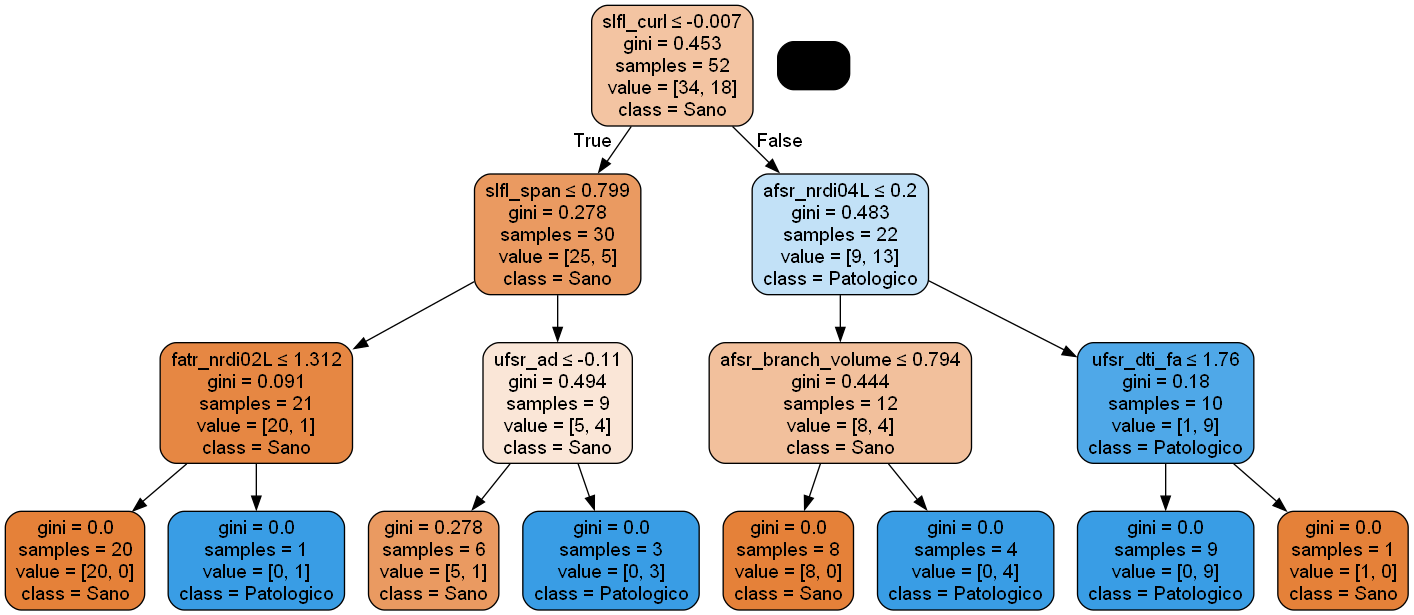

In [26]:
# libreria
#from sklearn.externals.six import StringIO 
from six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt

dot_data = StringIO()
export_graphviz(arbol, out_file=dot_data,
                feature_names=columnas,
                class_names=["Sano","Patologico"],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Overfitting: profundidad del árbol y post-pruning

Dado que los árboles son modelos que tienden a overfittear tenemos que recurrir a distintas técnicas para mitigar este problema. Veamos primero el efecto de la profundidad del árbol en el trade-off sesgo varianza.

In [27]:
profundidad = list(range(1,20))
resultados_train = []
resultados_test  = []

for depth in profundidad:
    # instanciamos el modelo uniforme
    arbol = DecisionTreeClassifier(criterion='gini', max_depth=depth, min_samples_leaf=1, min_samples_split=2, ccp_alpha=0, class_weight="balanced")
    arbol.fit(X_scaled, y_train)
    y_train_pred = arbol.predict(X_scaled)
    y_pred = arbol.predict(X_test_scaled)
    resultados_train.append(accuracy_score(y_train, y_train_pred))
    resultados_test.append(accuracy_score(y_test, y_pred))

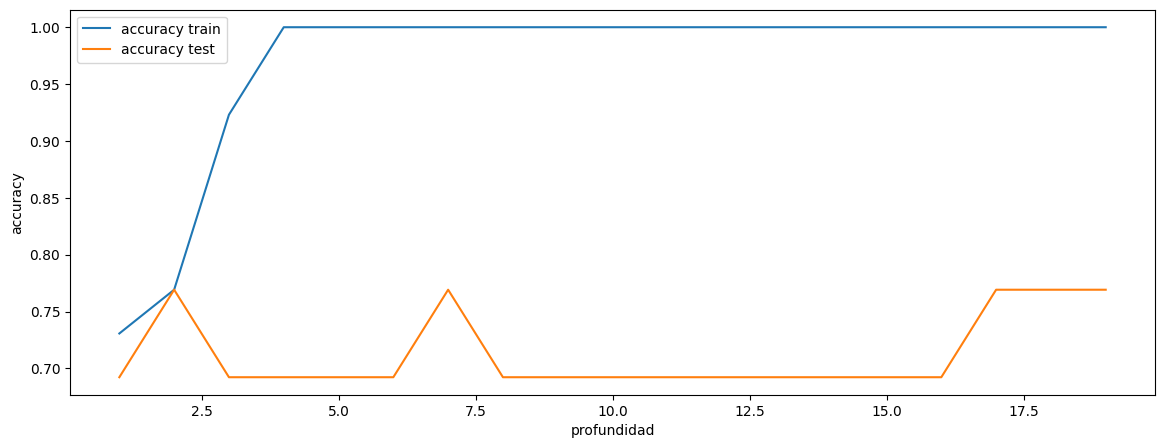

In [28]:
# veamos que paso en cada caso
f, ax = plt.subplots(1,1,figsize=(14,5),sharey=True)
ax.plot(profundidad, resultados_train, profundidad, resultados_test);
ax.legend(['accuracy train', 'accuracy test']);
ax.set(xlabel='profundidad',ylabel='accuracy');

In [29]:
# veamos que pasa con un árbol sin corte de profundidad
np.random.seed(2021)
arbol = DecisionTreeClassifier(criterion='gini', ccp_alpha=0)
arbol.fit(X_scaled, y_train)
#print(classification_report(y_true=y_test,y_pred=arbol.predict(X_test)))
print('Accuracy en entrenamiento: %f' % accuracy_score(y_train,arbol.predict(X_scaled)))
print('Accuracy en test: %f' % accuracy_score(y_test,arbol.predict(X_test_scaled)))

Accuracy en entrenamiento: 1.000000
Accuracy en test: 0.692308


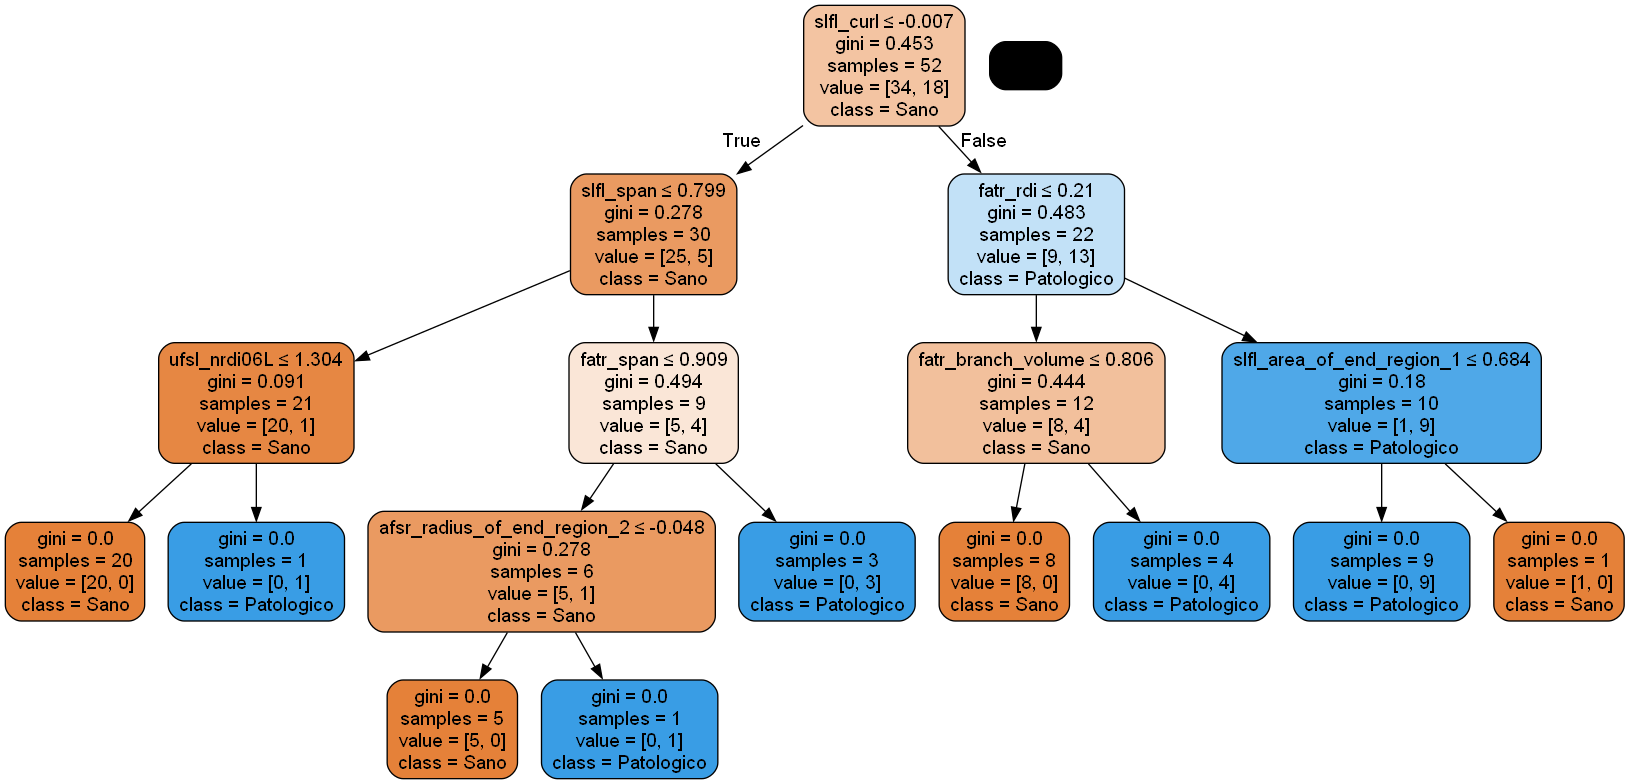

In [30]:
# grafiquemos este árbol
dot_data = StringIO()
export_graphviz(arbol, out_file=dot_data,
                feature_names=columnas,
                class_names=["Sano","Patologico"],    
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Una técnica que nos permite mitigar el overfitting es lo que se conoce como post-prunning. El objetivo de esta técnica es *podar* el árbol entrenado, penalizando de alguna forma los árboles más complejos. El algortimo de poda que tenemos implementado en Scikit-Learn es el [Minimal Cost-Complexity Pruning](https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning). El hiperparámetro que controla esta penalización es ccp_alpha$\geq 0$, cuando este hiperparámetro es 0, no realizamos ningún tipo de poda, y a medida que aumentamos dicho hiperparámetro penalizaremos más fuertemente la cantidad de nodos terminales del árbol.

In [31]:
arbol = DecisionTreeClassifier(criterion='gini', ccp_alpha=0.05)
arbol.fit(X_scaled, y_train)
#print(classification_report(y_true=y_test,y_pred=arbol.predict(X_test)))
print('Accuracy en entrenamiento: %f' % accuracy_score(y_train,arbol.predict(X_scaled)))
print('Accuracy en test: %f' % accuracy_score(y_test,arbol.predict(X_test_scaled)))

Accuracy en entrenamiento: 0.884615
Accuracy en test: 0.692308


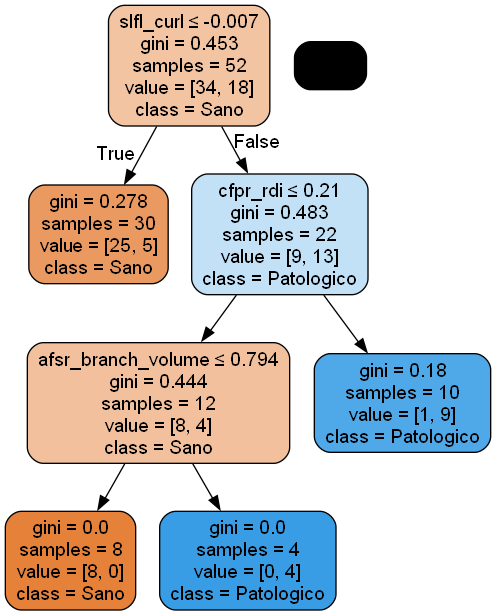

In [32]:
dot_data = StringIO()
export_graphviz(arbol, out_file=dot_data, 
                feature_names=columnas,
                class_names=["Sano","Patologico"],   
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

<Axes: >

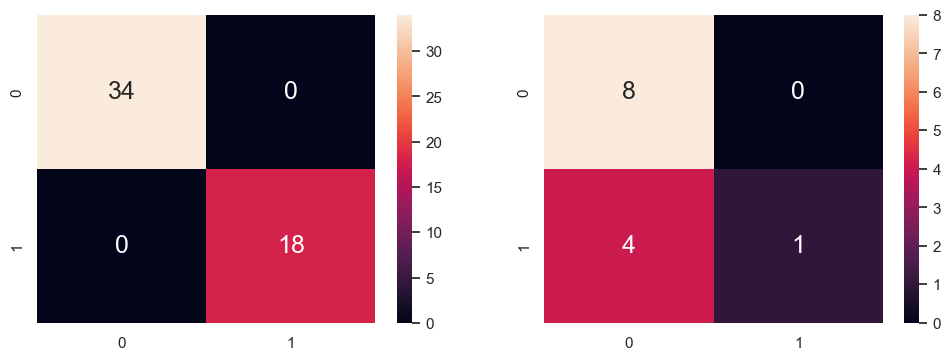

In [46]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(X_scaled, y_train)

y_train_pred = dectree.predict(X_scaled)
y_test_pred = dectree.predict(X_test_scaled)

f, axes = plt.subplots(1,2,figsize=(12,4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
          annot = True, fmt=".0f", annot_kws={"size":18}, ax=axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred),
          annot = True, fmt=".0f", annot_kws={"size":18}, ax=axes[1])

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
y_pred = clf.predict(X_test_scaled)
for i, tree in enumerate(clf.estimators_):
    cm = confusion_matrix(y_test, tree.predict(X_test_scaled))
    plt.subplot(1, len(clf.estimators_), i+1)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Tree {}'.format(i+1))
    plt.colorbar()
    tick_marks = np.arange(len(['sano','patol']))
    plt.xticks(tick_marks, ['sano','patol'], rotation=45)
    plt.yticks(tick_marks, ['sano','patol'])
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plt.show()

In [33]:
# veamos como afecta el rendimiento y la profundidad del árbol
ccp_alpha_vals = np.arange(0,1,0.05)
resultados_train = []
resultados_test  = []
profundidad      = []

for ccp in ccp_alpha_vals:
    # instanciamos el modelo uniforme
    arbol = DecisionTreeClassifier(criterion='gini', ccp_alpha=ccp)
    arbol.fit(X_scaled, y_train)
    # guardamos la profundidad del árbol
    profundidad.append(arbol.tree_.max_depth)
    y_train_pred = arbol.predict(X_scaled)
    y_pred = arbol.predict(X_test_scaled)
    resultados_train.append(accuracy_score(y_train, y_train_pred))
    resultados_test.append(accuracy_score(y_test, y_pred))

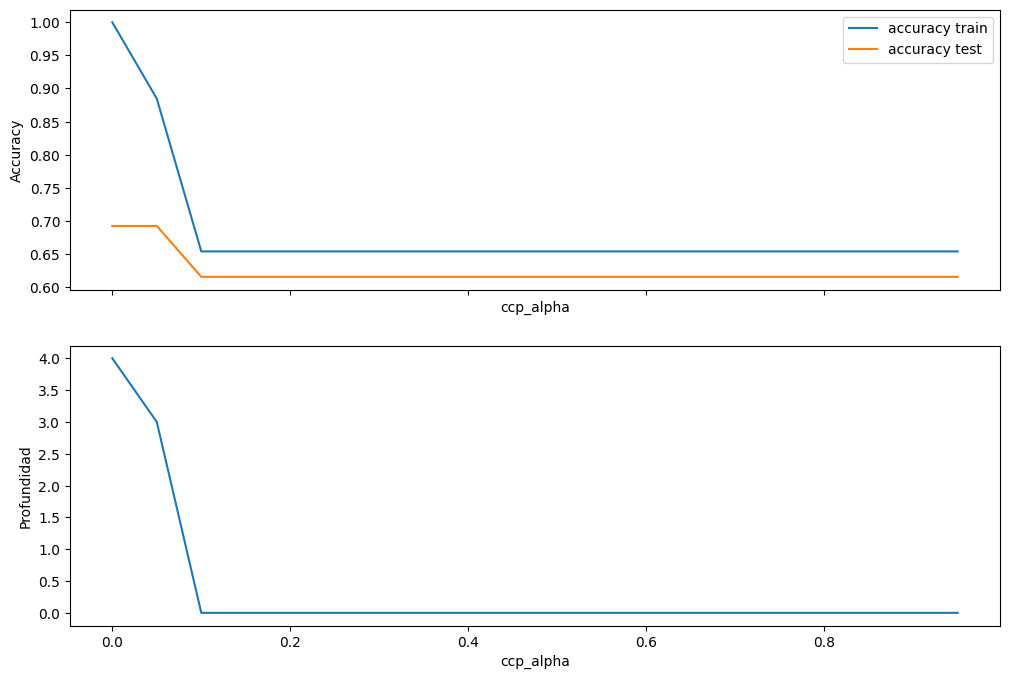

In [34]:
f,ax = plt.subplots(2,1,figsize=(12,8),sharex=True)
ax[0].plot(ccp_alpha_vals, resultados_train, ccp_alpha_vals, resultados_test);
ax[0].legend(['accuracy train', 'accuracy test']);
ax[0].set(xlabel='ccp_alpha',ylabel='Accuracy');
ax[1].plot(ccp_alpha_vals, profundidad)
ax[1].set(xlabel='ccp_alpha',ylabel='Profundidad');

In [35]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5,min_samples_leaf=5)
regr_1.fit(X_scaled, y_train)
regr_2.fit(X_scaled, y_train)
y_1 = regr_1.predict(X_test_scaled)
y_2 = regr_2.predict(X_test_scaled)

In [40]:
X_scaled.shape, y_train.shape

((52, 91), (52,))

In [ ]:
# Plot the results
plt.figure(figsize=(20,10))
plt.scatter(X_scaled, y_train, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test_scaled, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test_scaled, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.axvline(3.133,linestyle='dashed',color='black')
plt.axhline(0.571,linestyle='dashed',color='black')
plt.axhline(-0.667,linestyle='dashed',color='black')
plt.xlabel("X")
plt.ylabel("t")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()